# seaborn - 기본 그래프

matplotlib을 기반으로 하는 python 데이터 시각화 라이브러리

matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가하였음

## 주요 파라미터

| 파라미터 | 설명 |
|---|---|
| `data`ㅤ| 데이터 구조 입력. 일반적으로 데이터프레임 객체 |
| `x`, `y`ㅤ| x, y축의 값을 지정하는 변수<br/>`data`를 설정하지 않은 경우 리스트 등의 연속형 변수<br/>`data`를 설정한 경우 데이터프레임의 컬럼이름 |
| `hue` | 데이터를 구분하기 위한 그룹화 변수(범주형 변수)<br/>`data`를 설정한 경우 데이터프레임의 컬럼이름 |
| `size`ㅤ| 너비가 다른 선을 생성하는 그룹화 변수 (마커의 경우, 마커의 크기가 다르게 나타남) |
| `style`ㅤ| 다른 스타일의 마커 또는 선을 생성하는 그룹화 변수 |
| `palette`ㅤ| 색상 체계 선택 |

## #01. 기본 준비

### 패키지 참조

`seaborn` 패키지의 설치가 필요하다.

In [1]:
import sys
import seaborn as sb
from matplotlib import pyplot as plt
from pandas import read_excel

### 그래프 전역 설정

In [2]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

## #02. 기본 그래프

pie 그래프는 제공되지 않음

### 1) 선 그래프

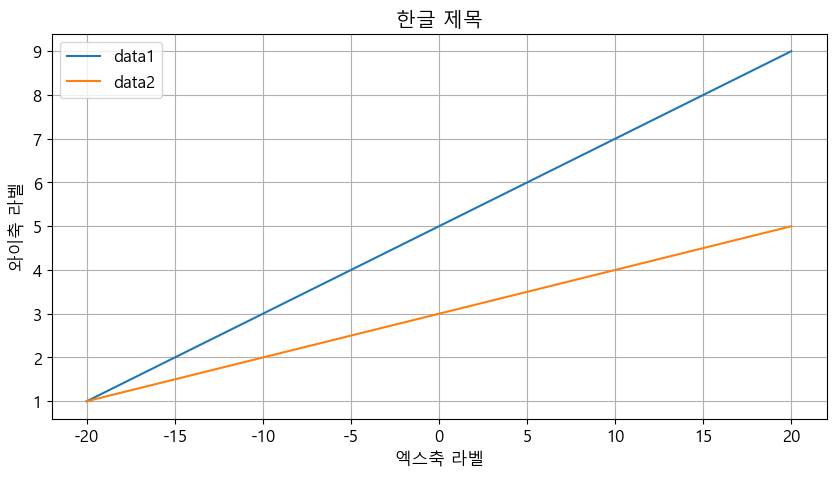

In [3]:
# 그래프 그리기 (서브플롯을 사용할 경우 ax 파라미터 사용 가능)
sb.lineplot(x=[-20, -10, 0, 10, 20], y=[1, 3, 5, 7, 9], label='data1')
sb.lineplot(x=[-20, -10, 0, 10, 20], y=[1, 2, 3, 4, 5], label='data2')

# 그 밖의 옵션은 matplotlib와 동일
plt.title('한글 제목')        # 그래프 제목
plt.xlabel("엑스축 라벨")      # x축 제목
plt.ylabel("와이축 라벨")      # y축 제목
plt.legend()
plt.grid()
plt.show()                  # 그래프 화면 표시
plt.close()                 # 그래프 그리기 종료

### 2) 세로 막대 그래프

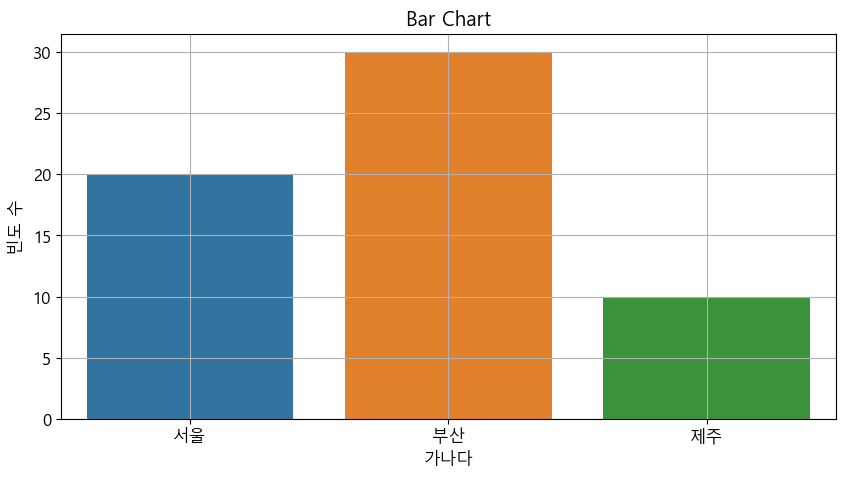

In [4]:
x = ["서울", "부산", "제주"]
y = [20, 30, 10]

sb.barplot(x=x, y=y)

plt.title("Bar Chart")
plt.xlabel("가나다")
plt.ylabel("빈도 수")
plt.grid()
plt.show()
plt.close()

### 3) 가로 막대 그래프

기본 제공 팔레트

x축과 y축을 바꿔서 설정

>  deep, muted, pastel, bright, dark, colorblind, Spectral

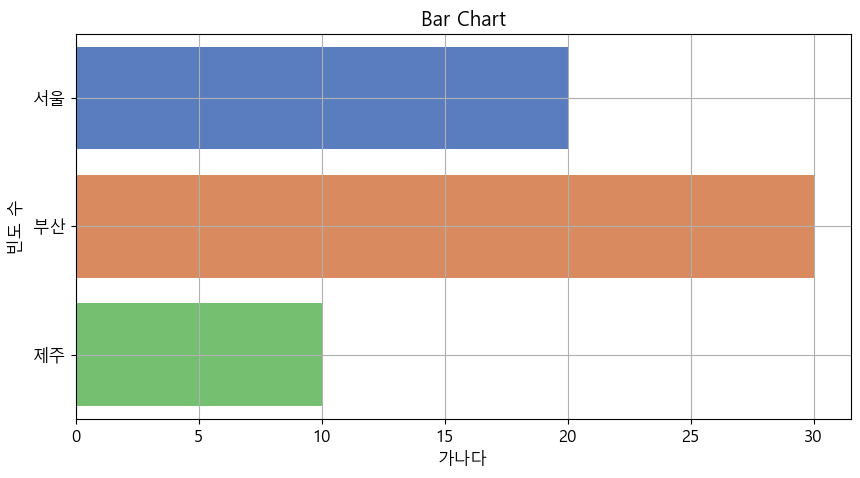

In [5]:
x = ["서울", "부산", "제주"]
y = [20, 30, 10]

sb.barplot(x=y, y=x, label='data', palette="muted")

plt.grid()
plt.title("Bar Chart")
plt.xlabel("가나다")
plt.ylabel("빈도 수")
plt.show()
plt.close()

### 4) 산점도 그래프

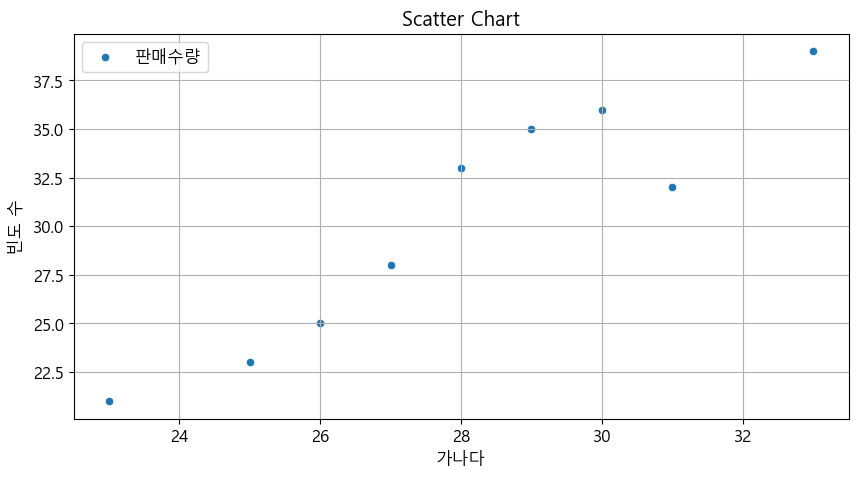

In [6]:
# 온도와 아이스크림 판매 수량
tmp = [ 23, 25, 26, 27, 28, 29, 30, 31, 33 ]
qty = [ 21, 23, 25, 28, 33, 35, 36, 32, 39 ]

sb.scatterplot(x=tmp, y=qty, label='판매수량')

plt.title("Scatter Chart")
plt.grid()
plt.xlabel("가나다")
plt.ylabel("빈도 수")
plt.show()
plt.close()

## #03. 데이터 프레임을 통한 그래프

### 1) 데이터 준비

In [7]:
df = read_excel("https://data.hossam.kr/D01/traffic_acc_year.xlsx", index_col="년도")
df

,발생건수,사망자수,부상자수
년도,,,
2005,214171,6376,342233
2006,213745,6327,340229
2007,211662,6166,335906
2008,215822,5870,338962
2009,231990,5838,361875
2010,226878,5505,352458
2011,221711,5229,341391
2012,223656,5392,344565
2013,215354,5092,328711


### 3) 막대 그래프

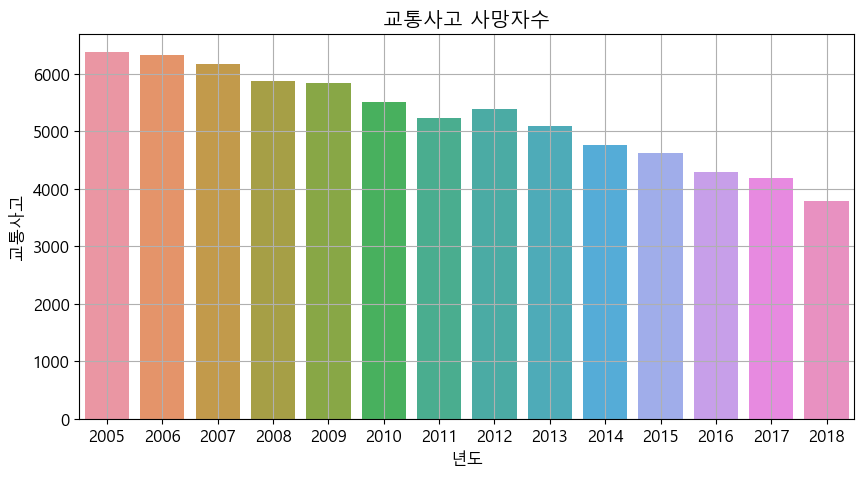

In [8]:
# 그래프 그리기 (서브플롯을 사용할 경우 ax 파라미터 사용 가능)
sb.barplot(data=df, x=df.index, y='사망자수')

plt.title('교통사고 사망자수')   # 그래프 제목
plt.xlabel("년도")      # x축 제목
plt.ylabel("교통사고")   # y축 제목
plt.grid()
plt.show()               # 그래프 화면 표시
plt.close()              # 그래프 그리기 종료

### 4) 산점도 그래프

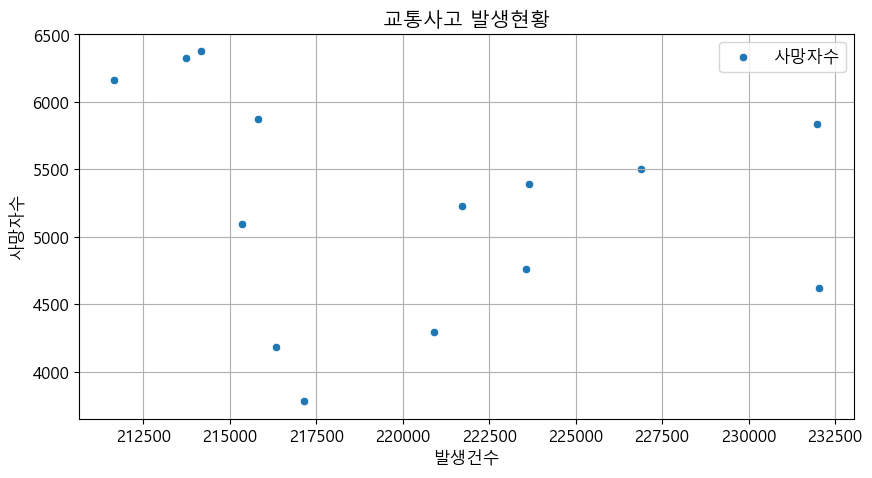

In [9]:
# 그래프 그리기 (서브플롯을 사용할 경우 ax 파라미터 사용 가능)
sb.scatterplot(data=df, x='발생건수', y='사망자수', label='사망자수')

plt.title('교통사고 발생현황')   # 그래프 제목
plt.xlabel("발생건수")      # x축 제목
plt.ylabel("사망자수")   # y축 제목
plt.legend()
plt.grid()
plt.show()               # 그래프 화면 표시
plt.close()              # 그래프 그리기 종료

### 5) 추세선을 포함한 산점도 그래프

추세선 주변에 보이는 구간은 `95%` 신뢰구간임

`fit_reg=False`를 추가하면 추세선이 표시되지 않게 되어 scatterplot 메서드와 동일한 결과를 보여준다(기본값=True)

`ci` 파라미터는 신뢰수준을 설정하며 기본값은 `95`이다.

`line_kws` 파라미터는 선의 색상, `scatter_kws`는 점의 색상

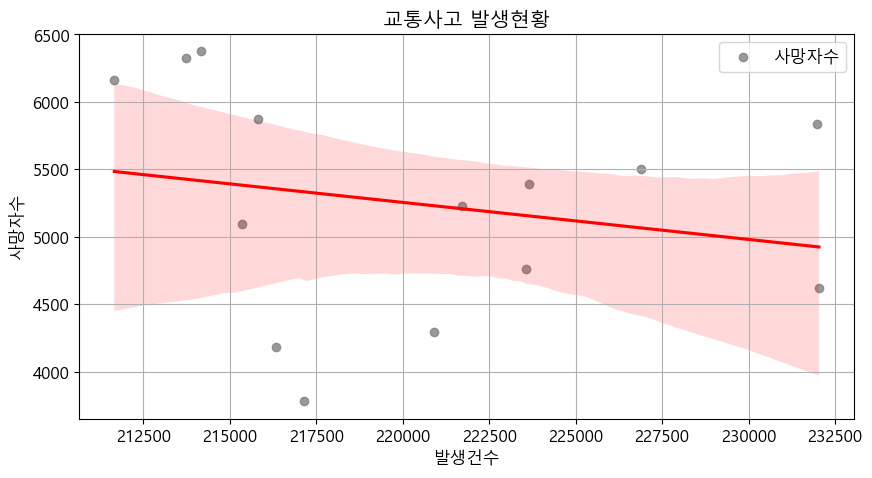

In [10]:
# 추세선을 함께 보여주는 산점도 그래프 그리기
sb.regplot(data=df, x='발생건수', y='사망자수', label='사망자수', 
           line_kws={'color': 'red'}, scatter_kws={'color': 'grey'})

plt.title('교통사고 발생현황')   # 그래프 제목
plt.xlabel("발생건수")          # x축 제목
plt.ylabel("사망자수")          # y축 제목
plt.legend()
plt.grid()
plt.show()               # 그래프 화면 표시
plt.close()              # 그래프 그리기 종료

### 5) 서브플롯에 기반한 선 그래프

> 서브 플롯을 사용하지 않을 경우 `sb.lineplot()` 함수에서 `ax` 파라미터 제거

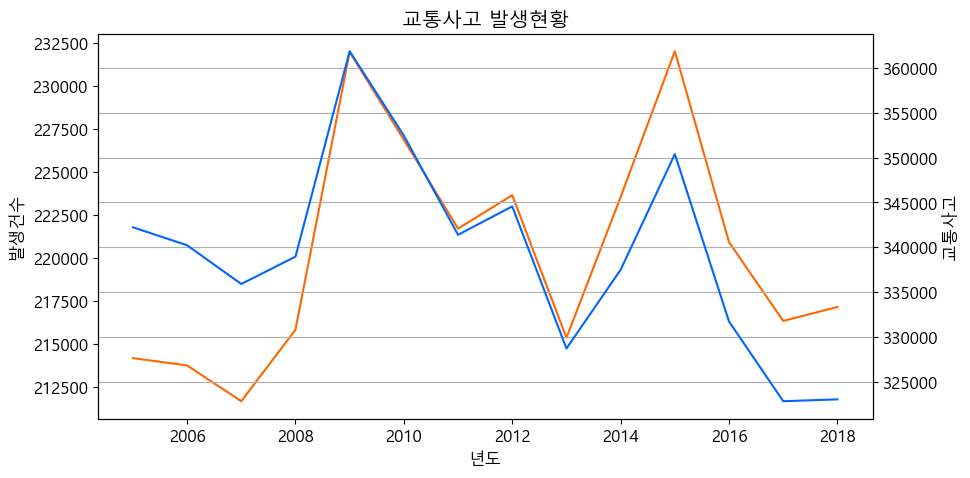

In [11]:
fig, ax1 = plt.subplots(1, 1)
ax2 = ax1.twinx()

# 그래프 그리기 (서브플롯을 사용할 경우 ax 파라미터 사용 가능)
sb.lineplot(data=df, x=df.index, y='발생건수', color='#ff6600', ax=ax1)
sb.lineplot(data=df, x=df.index, y='부상자수', color='#0066ff', ax=ax2)

plt.title('교통사고 발생현황')   # 그래프 제목
plt.xlabel("년도")      # x축 제목
plt.ylabel("교통사고")   # y축 제목
plt.grid()
plt.show()               # 그래프 화면 표시
plt.close()              # 그래프 그리기 종료